<center><h1>EDA on Customer Churn Dataset</h1></center>

import numpy, pandas, matplotlib

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the data

In [40]:
df = pd.read_csv("Dataset/Customer_churn_dataset.csv")

In [50]:
df.head(30)

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,City,Purchase_Count,Avg_Order_Value,Membership,Churn
0,1001,56,Female,7.629560e+05,16,Chennai,11,2854.54,Platinum,0
1,1002,46,Male,7.888730e+05,8,Bangalore,9,3231.06,Platinum,0
2,1003,32,Male,2.159530e+05,4,Pune,12,11097.03,Silver,0
3,1004,60,Male,6.503280e+05,4,Pune,10,2764.38,Gold,1
4,1005,25,Female,1.532670e+05,56,Pune,17,3901.14,Gold,0
5,1006,38,Male,2.327450e+05,25,Bangalore,14,14468.53,Gold,0
6,1007,56,Other,9.749450e+05,67,Bangalore,19,4201.94,Silver,0
7,1008,36,Male,3.071640e+05,96,Chennai,11,10093.67,Gold,1
8,1009,40,Female,6.856260e+05,67,Mumbai,6,14690.15,Silver,0
9,1010,43,Female,2.814840e+05,27,Chennai,13,5927.30,Gold,1


Info about dataset

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_ID      220 non-null    int64  
 1   Age              220 non-null    Int64  
 2   Gender           220 non-null    object 
 3   Annual_Income    220 non-null    float64
 4   Spending_Score   220 non-null    int64  
 5   City             209 non-null    object 
 6   Purchase_Count   220 non-null    int64  
 7   Avg_Order_Value  220 non-null    float64
 8   Membership       220 non-null    object 
 9   Churn            220 non-null    int64  
dtypes: Int64(1), float64(2), int64(4), object(3)
memory usage: 17.5+ KB


Change the Data type of age

In [23]:
df["Age"].dtype

dtype('float64')

In [42]:
df['Age'] = df['Age'].astype('Int64')

Number of missing values in the columns

In [ ]:
df.isnull().sum()

Customer_ID         0
Age                11
Gender              0
Annual_Income      11
Spending_Score      0
City               11
Purchase_Count      0
Avg_Order_Value    11
Membership          0
Churn               0
dtype: int64

% of missing value

In [10]:
df.isnull().mean()*100

Customer_ID        0.0
Age                5.0
Gender             0.0
Annual_Income      5.0
Spending_Score     0.0
City               5.0
Purchase_Count     0.0
Avg_Order_Value    5.0
Membership         0.0
Churn              0.0
dtype: float64

Visualizing the null values

<Axes: >

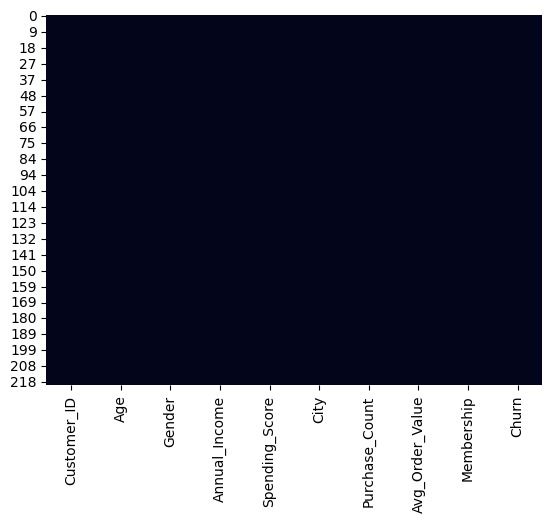

In [62]:
sns.heatmap(df.isnull(),cbar=False)

<Axes: >

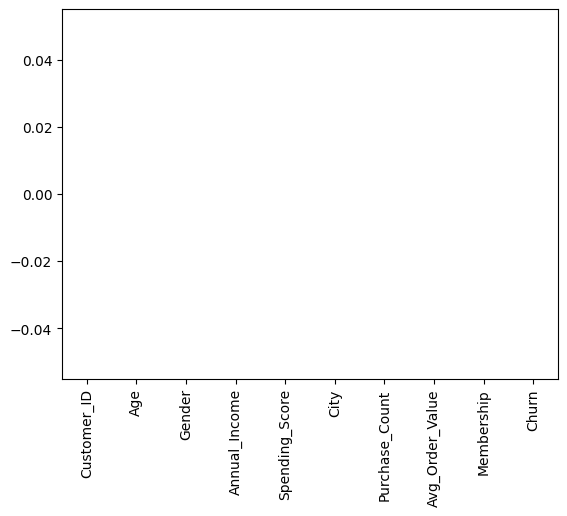

In [63]:
df.isnull().sum().plot(kind='bar')

Fill the missing values first

In [45]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [49]:
df["Annual_Income"] =df["Annual_Income"].fillna(df["Annual_Income"].mean())

In [54]:
df["Avg_Order_Value"] = df["Avg_Order_Value"].fillna(df["Avg_Order_Value"].median())

Drop the missing values

In [61]:
df.dropna(inplace=True)

<h3>Analyze Data</h3>

No. of Male and Female

In [66]:
df["Gender"].value_counts()

Gender
Male      102
Female     94
Other      13
Name: count, dtype: int64

Records per city

In [67]:
df.groupby("City").size()

City
Bangalore    38
Chennai      39
Delhi        38
Hyderabad    31
Mumbai       31
Pune         32
dtype: int64

Average income per city

In [69]:
df.groupby("City")["Annual_Income"].mean()

City
Bangalore    742127.435407
Chennai      687640.540793
Delhi        636114.803828
Hyderabad    591760.906158
Mumbai       588798.812317
Pune         665817.642045
Name: Annual_Income, dtype: float64

Count of people in cities by gender

In [73]:
df.groupby(["City","Gender"]).size()

City       Gender
Bangalore  Female    19
           Male      18
           Other      1
Chennai    Female    12
           Male      24
           Other      3
Delhi      Female    17
           Male      18
           Other      3
Hyderabad  Female    15
           Male      15
           Other      1
Mumbai     Female    13
           Male      13
           Other      5
Pune       Female    18
           Male      14
dtype: int64

Count of people by Membership

In [75]:
pd.crosstab(df["City"],df["Membership"])

Membership,Gold,Platinum,Silver
City,,,
Bangalore,13,7,18
Chennai,10,9,20
Delhi,14,7,17
Hyderabad,8,1,22
Mumbai,13,3,15
Pune,10,2,20


In [81]:
pd.pivot_table(
    df,
    index="City",
    values=["Annual_Income","Spending_Score"],
    aggfunc=["mean","sum","max"]
).reset_index()

City           mean                          sum                 \
              Annual_Income Spending_Score Annual_Income Spending_Score   
0  Bangalore  742127.435407      48.315789  2.820084e+07           1836   
1    Chennai  687640.540793      49.076923  2.681798e+07           1914   
2      Delhi  636114.803828      43.131579  2.417236e+07           1639   
3  Hyderabad  591760.906158      46.516129  1.834459e+07           1442   
4     Mumbai  588798.812317      54.161290  1.825276e+07           1679   
5       Pune  665817.642045      45.406250  2.130616e+07           1453   

            max                 
  Annual_Income Spending_Score  
0     1192892.0             99  
1     1118021.0            100  
2     1143176.0             95  
3     1120240.0             97  
4     1124304.0             98  
5     1184978.0            100